In [40]:
#First, we import all the libraries
import numpy as np
import pandas as pd
import scipy
from statsmodels.multivariate.pca import PCA
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [23]:
#Import and read the dataset, then explore the data

house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [66]:
print('The mean of the Houses sale price', house['SalePrice'].mean())

The mean of the Houses sale price 180921.19589041095


Text(0.5, 0, 'Sale Price')

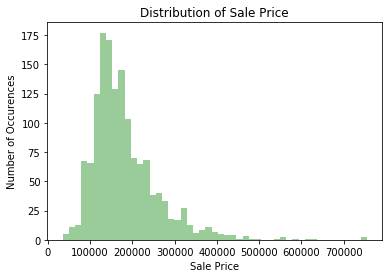

In [90]:
#Sales distribution histogram
sns.distplot(house['SalePrice'], color="g", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

In [46]:
house_correlation = house.corr()['SalePrice']
house_correlation.sort_values(ascending=False)

#We identify the top 10 of features with higher correlation with SalePrice
corrMatrix=house[["SalePrice","OverallQual","GrLivArea","GarageCars",
                 "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                 "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

In [ ]:
#Thanks to the correlation function, we can see that we have 10 features 
#in the datasat which have strong impact on the sale price: OverallQual, GarageCars, GarageArea, TotalBsmtSF, 
#1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt, YearRemodAdd

Text(0.5, 1.0, 'Correlation matrix')

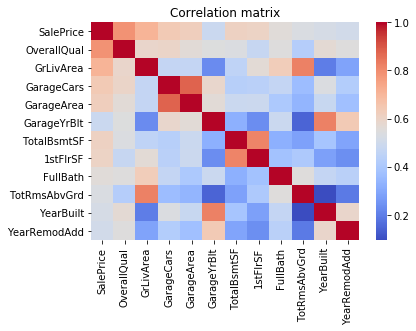

In [47]:
#Then, we want to examine the correlation with data vizualisation
sns.heatmap(corrMatrix, cmap='coolwarm')
plt.title('Correlation matrix')

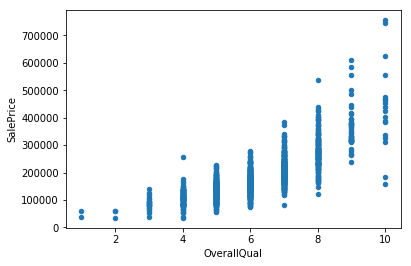

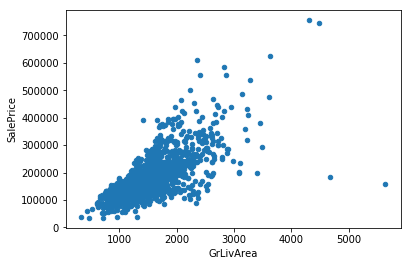

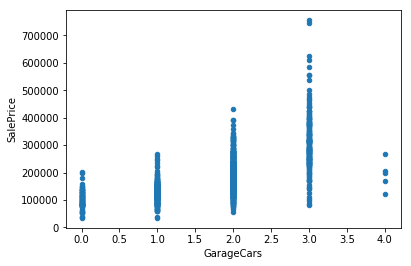

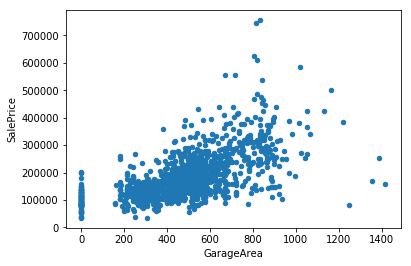

In [78]:
#Analyse profonde du lien entre les variables (régression etc)

ax1 = house.plot.scatter(x='OverallQual', y='SalePrice')
ax2 = house.plot.scatter(x='GrLivArea', y='SalePrice')
ax3 = house.plot.scatter(x='GarageCars', y='SalePrice')
ax4 = house.plot.scatter(x='GarageArea', y='SalePrice')

In [84]:
#Let's build a regression model for OverralQual and Sale Price features
x = sm.add_constant(house.SalePrice)
model = sm.OLS(house.GarageArea,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             GarageArea   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Sat, 21 Sep 2019   Prob (F-statistic):          5.27e-158
Time:                        16:17:50   Log-Likelihood:                -9544.9
No. Observations:                1460   AIC:                         1.909e+04
Df Residuals:                    1458   BIC:                         1.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.4214     10.889     15.559      0.0

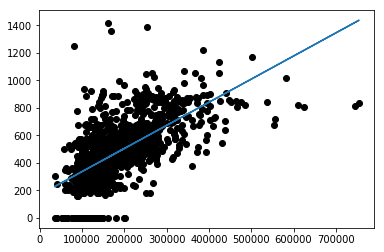

In [85]:
plt.scatter(house.SalePrice, house.GarageArea, color = 'black')
plt.plot(house.SalePrice, results.predict(x))

In [56]:
#Let's find the missing values for each features and determine the colums to remove
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [62]:
#We decide to remove the following:  MiscFeature, PoolQC, Alley, Fence
#Because they have a high proportion of missing values with the data seems not very interesting

house.drop(['MiscFeature', 'PoolQC', 'Alley', 'Fence'], axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [89]:
#Now, let's convert the categorial values to numerical

cat_columns = house.select_dtypes(['object']).columns
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#METHODO DU PROJET

#ANALYSER LA VARIABLE (INTUITIF)
#2. Identifier la variable: variable numérique ou catégorielle
#3. créer des groupes de variables
#4. un commentaire sur l'importance à priori de la variable pour le prix

#ANALYSE DE LA VARIABLE CIBLE
#analyse de la distribution : histogramme, moyenne, écart type, médiane, quantiles, skeness,
#relation visuelle entre les variables cible et variables supposées importantes

#ANALYSE GLOBALE
#1.matrice de corrélation : essayer d'identifier une sous partie de l'ensemble avec les 10 variables 
#les plus corrélées avec la variable cible
#2.conclusion intérmédiaire
#3. analyse profonde du lien entre les variables (régression etc)

#DATA CLEANING
#1. Remove missing values
#2. Remove outliers 
#3. Categorielle en numerical values
#4. Standardization

#DATA VIZUALISATION 
#pca
